# PA 1.7: Classy Distributions

<h1 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; top: 60px;right: 30px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" style="width:100px" />
    <img src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" style="width:100px" />
</h1>
<h2 style="height: 10px">
</h2>

*[CEGM1000 MUDE](http://mude.citg.tudelft.nl/): Week 1.7. Due: complete this PA prior to class on Friday, Oct 18, 2024.*

## Overview of Assignment

This assignment will help you understand more about Object Oriented Programming (OOP) in Python, by exploring how it's used in Scipy. In Python, OOP is done through classes, so you'll learn a bit about how classes can be useful and how to define and instantiate them. You will also learn about subclassing, otherwise known as inheritance, which is the ability for one (child) class to inherit the properties of another (parent) class.

## Part 1: Playing with subclasses

We'll start by looking at some simple code that shows all the basics: defining a class, instantiating classes and inheritance. You're not required to do anything with it, but feel free to change this and play around!

In [1]:
class Person:
    def __init__(self, name):
        self.name = name
    
    def say_hello(self):
        print(f"Hey, I'm {self.name}, nice to meet you!")

class Employee(Person):
    known_salaries = {"janitor": 50000, "professor": 100, "trader": 100000}
    
    def __init__(self, name, job):
        super().__init__(name)
        self.job = job
    
    def salary(self):
        if self.job.lower() in self.known_salaries:
            print(f"My salary is ${self.known_salaries[self.job.lower()]}!")
        else:
            print("I'm not too sure what my salary is :(")

class Friend(Person):
    def say_hello(self):
        print("Yoo, how are you doing? It's lovely to see you again :)")

def greet_person(person):
    person.say_hello()
    print(f"Hey {person.name}!")

In [2]:
james = Person("James")
james.say_hello()
print()

emma = Employee("Emma", "Janitor")
emma.salary()
emma.say_hello()
print()

philip = Friend("Philip")
greet_person(philip)
print()
greet_person(emma)

Hey, I'm James, nice to meet you!

My salary is $50000!
Hey, I'm Emma, nice to meet you!

Yoo, how are you doing? It's lovely to see you again :)
Hey Philip!

Hey, I'm Emma, nice to meet you!
Hey Emma!


Notice that Emma can say hello, but James doesn't have a salary! The children class *extends* the parent. Confused about the `__init__` or `self`? Go check out the [reading](#Reading)! Also notice that since the `Friend` subclass and `Employee` subclasses both have `say_hello`, we can use either one in the `greet_person` function. You'll use this princople to complete **Task 1.1**.

## Part 2: Inheritance and Distributions

In this part we will use inheritance to create our own custom distribution using the parent class `scipy.stats.rv_continuous`!

First we will define a function to help make plots easily, then we will confirm we can create a distribution. Finally, you will implement your own child class of `scipy.stats.rv_continuous`.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.1:</b>   
Below there's some code that takes a distribution from Scipy and plots it. Read it to understand what it does, then run the cell so that we can use it later.
</p>
</div>

In [3]:
# DO NOT TOUCH ANYTHING IN THIS CODE CELL!

import scipy.stats
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

def plot_distribution(distribution, x_bounds = (-5, 5), function="pdf"):
    X_LOW, X_HIGH = x_bounds

    x_axis = np.linspace(X_LOW, X_HIGH, num=1000)
    
    distribution_function = None
    
    if function == "pdf":
        distribution_function = distribution.pdf
    elif function == "cdf":
        distribution_function = distribution.cdf
    else:
        raise KeyError(f"{function} function not supported")
    
    y_axis = np.vectorize(distribution_function)(x_axis)

    plt.figure(figsize=(15, 5))
    plt.plot(x_axis, y_axis)
    plt.title("PDF of distribution")
    plt.xlabel("x")
    plt.xticks(np.linspace(X_LOW, X_HIGH, num=((X_HIGH - X_LOW) * 2 + 1)))
    plt.ylabel("f(x)")
    plt.show()
    
    return x_axis, y_axis

In Scipy all distributions are children of the same parent class [`rv_continous`](https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.rv_continuous.html#scipy.stats.rv_continuous). Read the documentation to get a feeling for what this parent class defines. One method it defines is the `.pdf` method, so if we just rely on that, we can freely swap between children classes!

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.2:</b>   
Below there's some code that takes a Normal distribution from Scipy and plots it, using our function. Pretty cool, right?

Test your understanding of this distribution by changing the standard deviation to 3 instead of 1. Does the figure respond as expected?
</p>
</div>

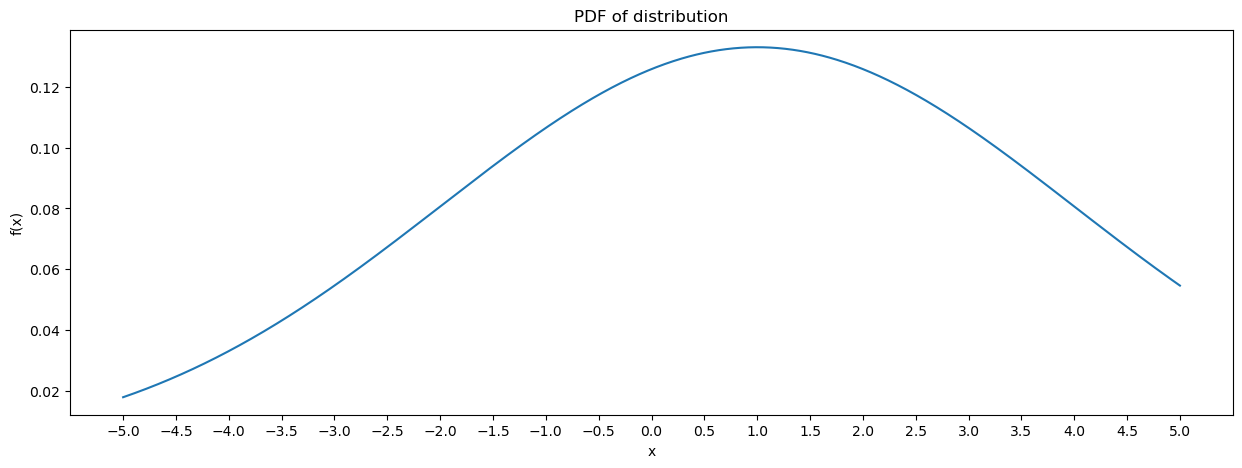

In [4]:
# distribution = scipy.stats.norm(loc = 1)
# x_axis, y_axis = plot_distribution(distribution)

# SOLUTION
distribution = scipy.stats.norm(loc = 1, scale = 3)
x_axis, y_axis = plot_distribution(distribution)

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 1.3:</b>   
Complete the code below to create your own Uniform distribution from 1 to 3 and use the plotting function to confirm you have done it correctly.
</p>
</div>

<div style="background-color:#facb8e; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"> <p>At this point, it becomes important that you understand what a continuous parametric distribution is. If you have no idea what we are talking about, it is time to read the theory textbook chapters for this week!</p></div>

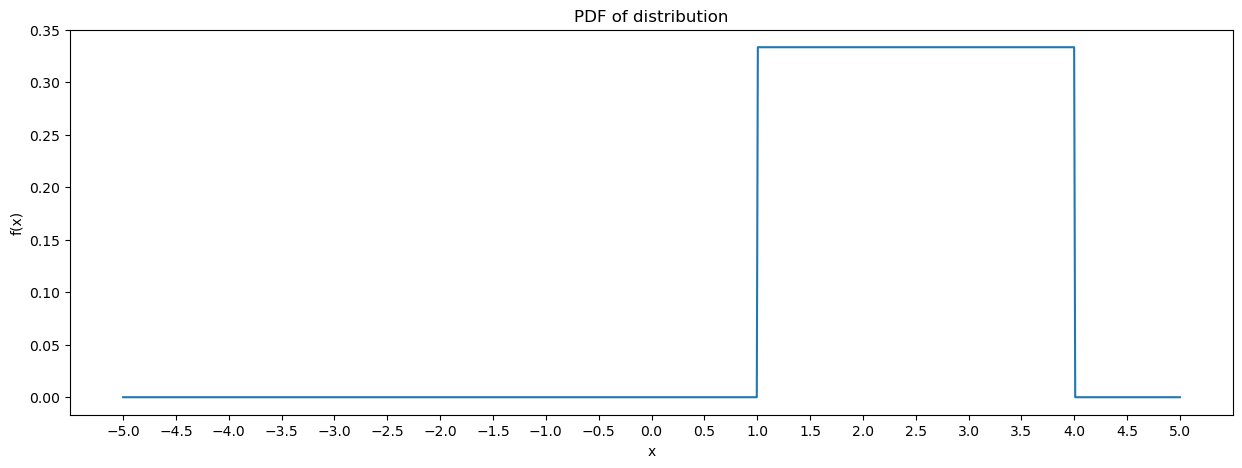

In [5]:
# distribution = scipy.stats.uniform(YOUR_CODE_HERE)
# x_axis, y_axis = plot_distribution(distribution)

#SOLUTION
distribution = scipy.stats.uniform(loc = 1, scale = 3)
x_axis, y_axis = plot_distribution(distribution)

## Part 3: Making a subclass

No let's see if we can define our own distribution! We can do this by creating a subclass of `rv_continous`. Reading documentation can be difficult to begin with, but try and see if you can think of how this would be done.

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.1:</b>   
Complete the implementation of the subclass below, so that the pdf is defined as follows:

\begin{equation}
f(x)=
    \begin{cases}
        0.1 & \text{if } 0 < x < 3.6 \\
        2(x-5) &  5 < x < 5.8 \\
        0 & \text{elsewhere}
    \end{cases}
\end{equation}
    
You don't need to worry about the `scale` or `loc` parameters we used earlier.
</p>
</div>

In [7]:
# class new_distribution(YOUR_CODE_HERE):
#     """ A new piece-wise distribution."""
    
#     def _pdf(self, x):
#         """ f(x) = 
#             0.1      when 0 < x < 3.6
#             2(x - 5) when 5 < x < 5.8
#         """

#         YOUR_CODE_HERE # MORE THAN ONE LINE!
        
#         return YOUR_CODE_HERE

# SOLUTION:
class new_distribution(scipy.stats.rv_continuous):
    """ A new piece-wise distribution."""
    
    def _pdf(self, x):
        """ f(x) = 
            0.1      when 0 < x < 3.6
            2(x - 5) when 5 < x < 5.8
        """
        if 0 < x < 3.6:
            return 0.1
        
        if 5 < x < 5.8:
            return 2 * (x - 5)
        
        return 0

<div style="background-color:#facb8e; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px"> <p>There is an <code>IntegrationWarning</code> that appears when integrating this PDF, which we can supress as follows. This works here on the last step, but you should use it with caution in other applications!</p></div>

In [8]:
import warnings
warnings.simplefilter("ignore")

<div style="background-color:#AABAB2; color: black; width:95%; vertical-align: middle; padding:15px; margin: 10px; border-radius: 10px">
<p>
<b>Task 3.2:</b>   

Use the plotting function to check that you implemented the class correctly. You need to do this by instantiating the class in the missing piece of code.
</p>
</div>

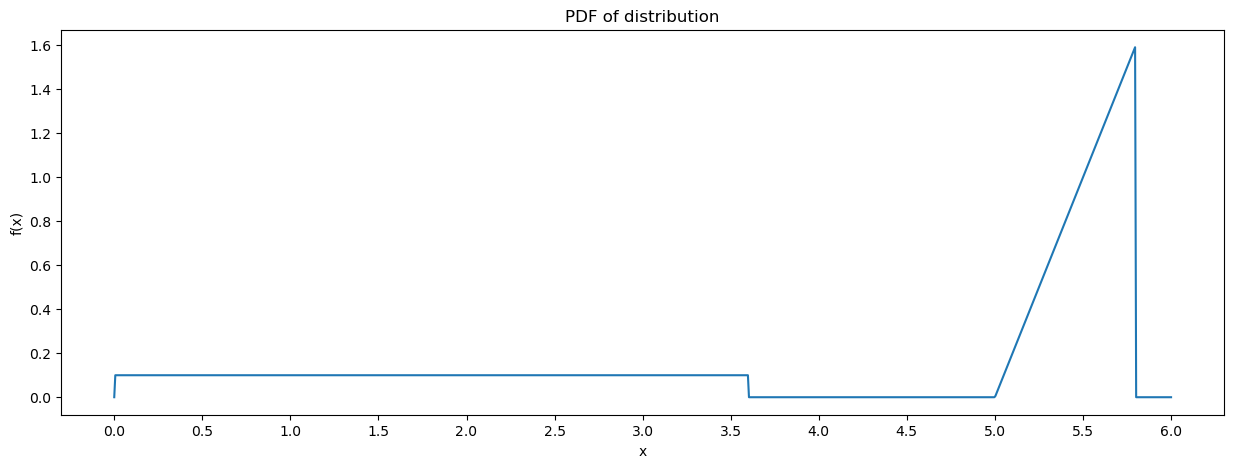

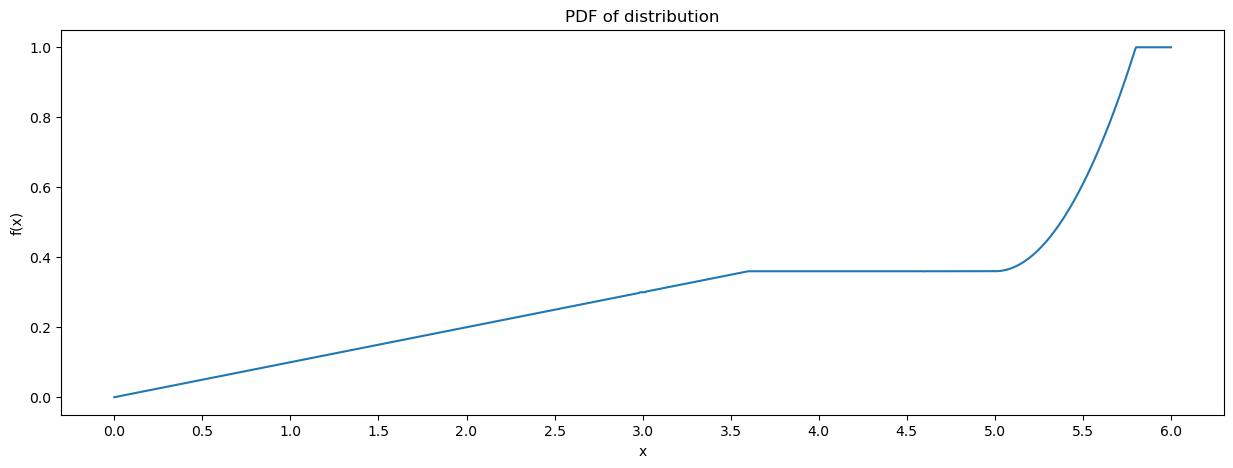

In [9]:
# plot_distribution(YOUR_CODE_HERE, x_bounds = (0, 6))
# plot_distribution(YOUR_CODE_HERE, x_bounds = (0, 6), function="cdf")
# print()

# SOLUTION:
plot_distribution(new_distribution(), x_bounds = (0, 6))
plot_distribution(new_distribution(), x_bounds = (0, 6), function="cdf")
print()

Even the CDF of our custom distribution works! There's a lot of magic that can be accomplished with classes, which you won't need to known for MUDE, but this foundation will help you understand it the day you do!

**End of notebook.**
<h2 style="height: 60px">
</h2>
<h3 style="position: absolute; display: flex; flex-grow: 0; flex-shrink: 0; flex-direction: row-reverse; bottom: 60px; right: 50px; margin: 0; border: 0">
    <style>
        .markdown {width:100%; position: relative}
        article { position: relative }
    </style>
    <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">
      <img alt="Creative Commons License" style="border-width:; width:88px; height:auto; padding-top:10px" src="https://i.creativecommons.org/l/by/4.0/88x31.png" />
    </a>
    <a rel="TU Delft" href="https://www.tudelft.nl/en/ceg">
      <img alt="TU Delft" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/tu-logo/TU_P1_full-color.png" />
    </a>
    <a rel="MUDE" href="http://mude.citg.tudelft.nl/">
      <img alt="MUDE" style="border-width:0; width:100px; height:auto; padding-bottom:0px" src="https://gitlab.tudelft.nl/mude/public/-/raw/main/mude-logo/MUDE_Logo-small.png" />
    </a>
    
</h3>
<span style="font-size: 75%">
&copy; Copyright 2024 <a rel="MUDE" href="http://mude.citg.tudelft.nl/">MUDE</a> TU Delft. This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by/4.0/">CC BY 4.0 License</a>.